In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 158M/163M [00:01<00:00, 137MB/s]
100% 163M/163M [00:01<00:00, 129MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image


In [ ]:
with_mask_dir = os.listdir('./data/with_mask')
without_mask_dir = os.listdir('./data/without_mask')

print(with_mask_dir[:10])
print(without_mask_dir[:10])

['with_mask_2142.jpg', 'with_mask_1633.jpg', 'with_mask_1957.jpg', 'with_mask_1653.jpg', 'with_mask_1958.jpg', 'with_mask_735.jpg', 'with_mask_3670.jpg', 'with_mask_1450.jpg', 'with_mask_911.jpg', 'with_mask_722.jpg']
['without_mask_1773.jpg', 'without_mask_118.jpg', 'without_mask_3667.jpg', 'without_mask_2812.jpg', 'without_mask_14.jpg', 'without_mask_2175.jpg', 'without_mask_2096.jpg', 'without_mask_513.jpg', 'without_mask_2262.jpg', 'without_mask_837.jpg']


In [ ]:
print('with mask images', len(with_mask_dir))
print('without mask images', len(without_mask_dir))

with mask images 3725
without mask images 3828


In [ ]:
# create labels
with_mask_img_lab = [1]* len(with_mask_dir)
without_mask_img_lab = [0]* len(without_mask_dir)

In [ ]:
print(with_mask_img_lab[:10])
print(without_mask_img_lab[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_img_lab+ without_mask_img_lab

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


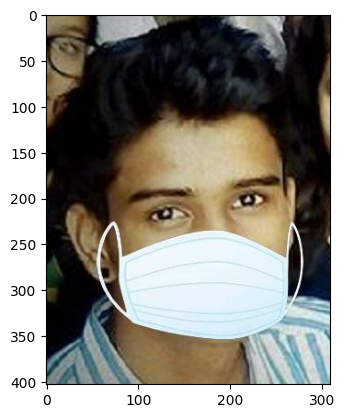

In [ ]:
# display with mask image
img = mpimg.imread('./data/with_mask/with_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays
with_mask_path = './data/with_mask/'
without_mask_path = './data/without_mask/'

data = []

for img_file in with_mask_dir:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for img_file in without_mask_dir:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data), len(data)

(list, 7553)

array([[[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236]],

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [235, 235, 235]],

       ...,

       [[158, 158, 158],
        [158, 158, 158],
        [158, 158, 158],
        ...,
        [158, 158, 158],
        [158, 158, 158],
        [158, 158, 158]],

       [[157, 157, 157],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [157, 157, 157],
        [157, 157, 157],
        [157, 157, 157]],

       [[157, 157, 157],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [157, 157, 157],
        [157, 157, 157],
        [157, 157, 157]]], dtype=uint8)
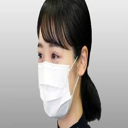

In [ ]:
data[0]

In [ ]:
data[0].shape, type(data[0])
#  128 X 128 3 RGB

((128, 128, 3), numpy.ndarray)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(data),np.array(labels), test_size=0.2, random_state=42)



In [ ]:
X_train.shape, X_test.shape

((6042, 128, 128, 3), (1511, 128, 128, 3))

In [ ]:
y_train.shape, y_test.shape

((6042,), (1511,))

In [ ]:
# scaling the data
# 128+128 =256
X_train_scaled = X_train/255
X_test_scaled= X_test/255
X_train_scaled[0]

array([[[0.93333333, 0.92156863, 0.94509804],
        [0.93333333, 0.92156863, 0.94901961],
        [0.93333333, 0.91764706, 0.95294118],
        ...,
        [0.49019608, 0.39607843, 0.37254902],
        [0.40784314, 0.39215686, 0.39215686],
        [0.48235294, 0.43921569, 0.43137255]],

       [[0.92941176, 0.92156863, 0.9372549 ],
        [0.92941176, 0.92156863, 0.94117647],
        [0.92941176, 0.92156863, 0.94117647],
        ...,
        [0.57254902, 0.49411765, 0.44705882],
        [0.43921569, 0.36470588, 0.35294118],
        [0.43921569, 0.43137255, 0.41176471]],

       [[0.9254902 , 0.92156863, 0.94117647],
        [0.9254902 , 0.92156863, 0.94117647],
        [0.9254902 , 0.92156863, 0.94117647],
        ...,
        [0.56470588, 0.5372549 , 0.50196078],
        [0.55294118, 0.43921569, 0.38431373],
        [0.41176471, 0.36078431, 0.33333333]],

       ...,

       [[0.4627451 , 0.42352941, 0.40392157],
        [0.41176471, 0.4       , 0.4       ],
        [0.43137255, 0

In [ ]:
# Building the CNN

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from sklearn.pipeline import Pipeline


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

num_of_classes = 2

# Define the model architecture
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),  # Increased dropout rate
    Dense(32, activation='relu'),
    Dropout(0.2),  # Increased dropout rate
    Dense(num_of_classes, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Monitor validation loss

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test data (assuming you have X_test_scaled and y_test)
loss, score = model.evaluate(X_test_scaled, y_test, verbose=0)

# Print the test accuracy
print("Test accuracy:", score)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 88s 504ms/step - accuracy: 0.6477 - loss: 0.6691 - val_accuracy: 0.8826 - val_loss: 0.2847
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 488ms/step - accuracy: 0.8990 - loss: 0.2675 - val_accuracy: 0.8992 - val_loss: 0.2568
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 136s 454ms/step - accuracy: 0.9152 - loss: 0.2111 - val_accuracy: 0.9190 - val_loss: 0.2288
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 89s 493ms/step - accuracy: 0.9304 - loss: 0.1700 - val_accuracy: 0.9025 - val_loss: 0.2731
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 476ms/step - accuracy: 0.9530 - loss: 0.1370 - val_accuracy: 0.9207 - val_loss: 0.2348
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 79s 463ms/step - accuracy: 0.9613 - loss: 0.0980 - val_accuracy: 0.9223 - val_loss: 0.2531
Test accuracy: 0.9252150654792786


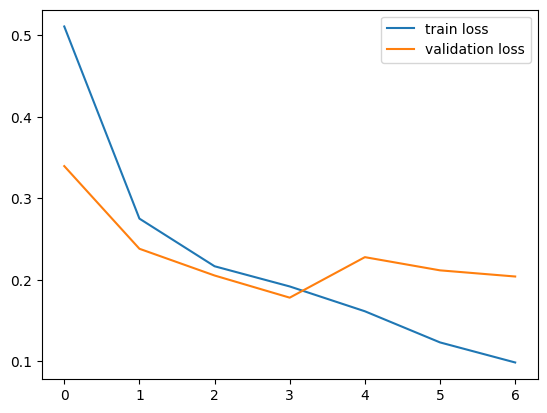

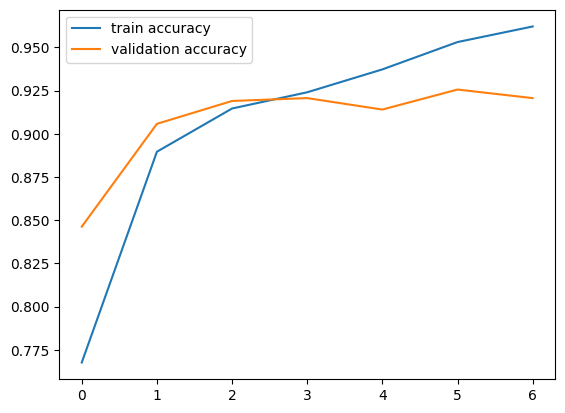

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

KeyboardInterrupt: Interrupted by user

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical


input_image_path = input('Path of the image to be predicted: ')

# Print the path to verify it
print("Image path:", input_image_path)

# Use cv2.imread to load the image
input_image = cv2.imread(input_image_path)

# Check if the image was loaded successfully
if input_image is None:
    print(f"Error: Could not load image from {input_image_path}. Please check the path and file.")
else:
    cv2_imshow(input_image)

    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    input_prediction = model.predict(input_image_reshaped)
    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')

In [ ]:
model.save('mask_model.h5')
print("Model saved")

Model saved
